<a href="https://colab.research.google.com/github/Bharatgaur/RawProjects/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

### <u> Tasks </u>
* ### Validate all the assumptions
* ### Compute all the regression evaluation metrics
* ### Comment on the best evaluation metrics for this problem

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-2-785ce3daae19>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [3]:
# The raw content URL
url = "https://raw.githubusercontent.com/Bharatgaur/RawProjects/main/50_Startups.csv"

# Load the dataset
dataset = pd.read_csv(url)

# Display the first few rows of the dataset
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
len(dataset)

50

In [5]:
dataset.shape

(50, 5)

In [6]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

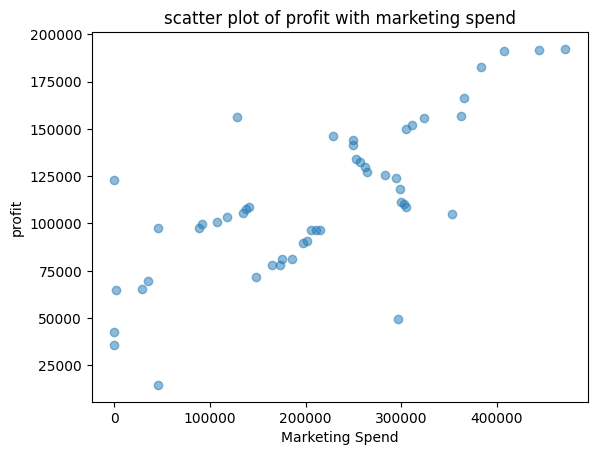

In [7]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('scatter plot of profit with marketing spend')
plt.xlabel('Marketing Spend')
plt.ylabel('profit')
plt.show()

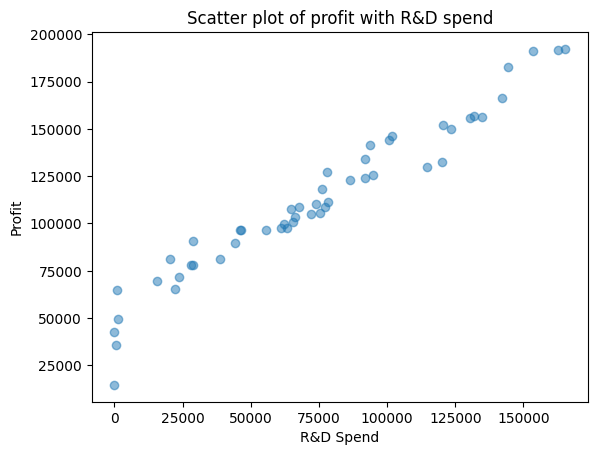

In [8]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of profit with R&D spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

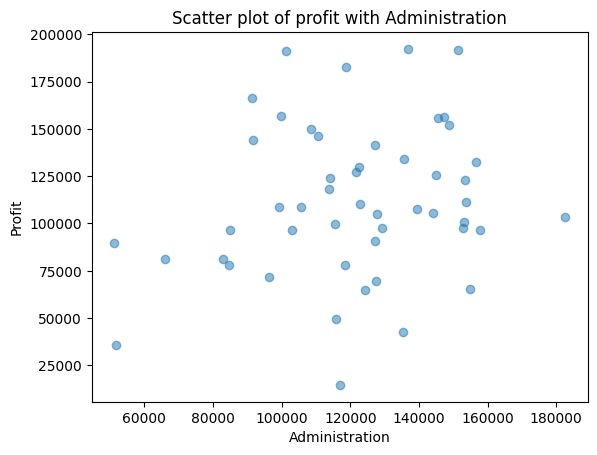

In [9]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

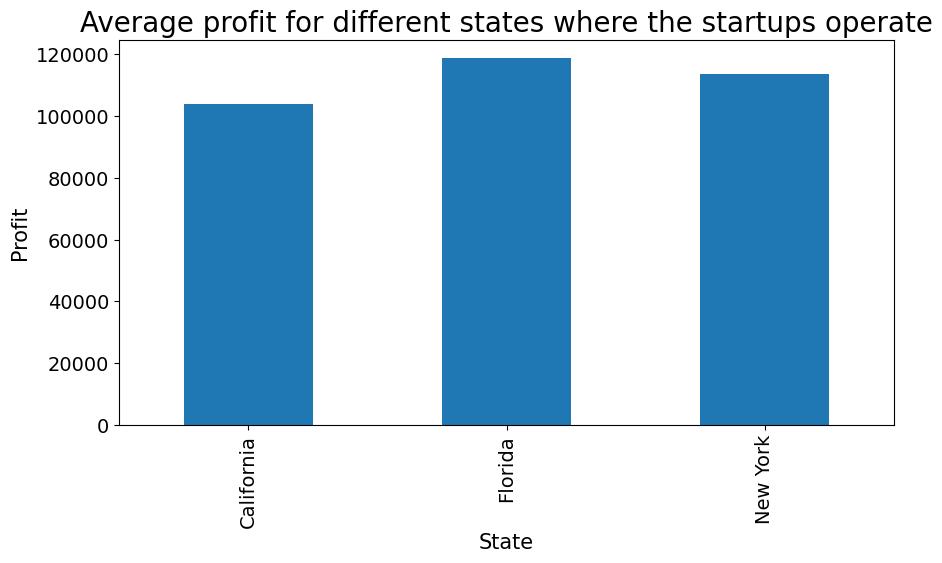

In [10]:
# Create the figure object
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [11]:
dataset.State.value_counts()

,count
State,
New York,17
California,17
Florida,16


In [12]:
# Create dummy variables for the catgeorical variable State
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [13]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [14]:
dependent_variable = 'Profit'

In [15]:
# Create a list of independent variables

independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [16]:
independent_variables

['NewYork_State',
 'Administration',
 'California_State',
 'R&D Spend',
 'Florida_State',
 'Marketing Spend']

In [17]:
# Create the data of independent variables
X = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [18]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train[0:10]

array([[0.        , 0.48655174, 0.        , 0.33561668, 1.        ,
        0.45494286],
       [1.        , 0.3173015 , 0.        , 0.2782839 , 0.        ,
        0.43561799],
       [0.        , 0.87258866, 0.        , 0.45557444, 1.        ,
        0.28413435],
       [0.        , 1.        , 1.        , 0.2807759 , 0.        ,
        0.44680961],
       [0.        , 0.59103645, 0.        , 0.55488118, 1.        ,
        0.62511553],
       [0.        , 0.88568959, 0.        , 0.7880179 , 1.        ,
        0.68649342],
       [0.        , 0.98922572, 0.        , 0.72539353, 1.        ,
        0.54370828],
       [1.        , 0.6847981 , 0.        , 0.0060492 , 0.        ,
        0.0040356 ],
       [1.        , 0.00432296, 0.        , 0.00327821, 0.        ,
        0.        ],
       [1.        , 0.95618996, 0.        , 0.39676926, 0.        ,
        0.22709197]])

In [21]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [23]:
math.sqrt(mean_squared_error(y_test, y_pred))

9137.99015279494

In [24]:
r2_score(y_test, y_pred)

0.9347068473282425

# Validating Assumptions

In [25]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [26]:
#Residual = Actual value - Predicted value

residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

## Lets check for heteroscedasticity:

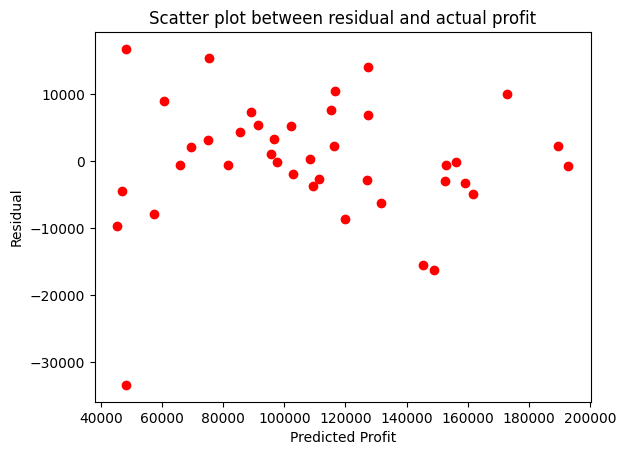

In [27]:
#  Plotting scatter plot between residual and fitted values
plt.scatter(y_train_pred, residuals_train,c='red')
plt.title('Scatter plot between residual and actual profit')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual')
plt.show()

Seems like there is no significant pattern visible. So the assumption of homoscedasticity is valid.

## Let's check if the mean of residuals is almost zero:

In [28]:
round((np.mean(residuals_train)))

0

Yes, the mean of residuals is almost zero!

## Let's check for multicollinearity:

In [29]:
dataset[independent_variables].corr()

,NewYork_State,Administration,California_State,R&D Spend,Florida_State,Marketing Spend
NewYork_State,1.000000,0.005145,-0.515152,0.039068,-0.492366,-0.033670
Administration,0.005145,1.000000,-0.015478,0.241955,0.010493,-0.032154
California_State,-0.515152,-0.015478,1.000000,-0.143165,-0.492366,-0.168875
R&D Spend,0.039068,0.241955,-0.143165,1.000000,0.105711,0.724248
Florida_State,-0.492366,0.010493,-0.492366,0.105711,1.000000,0.205685
Marketing Spend,-0.033670,-0.032154,-0.168875,0.724248,0.205685,1.000000


<Axes: >

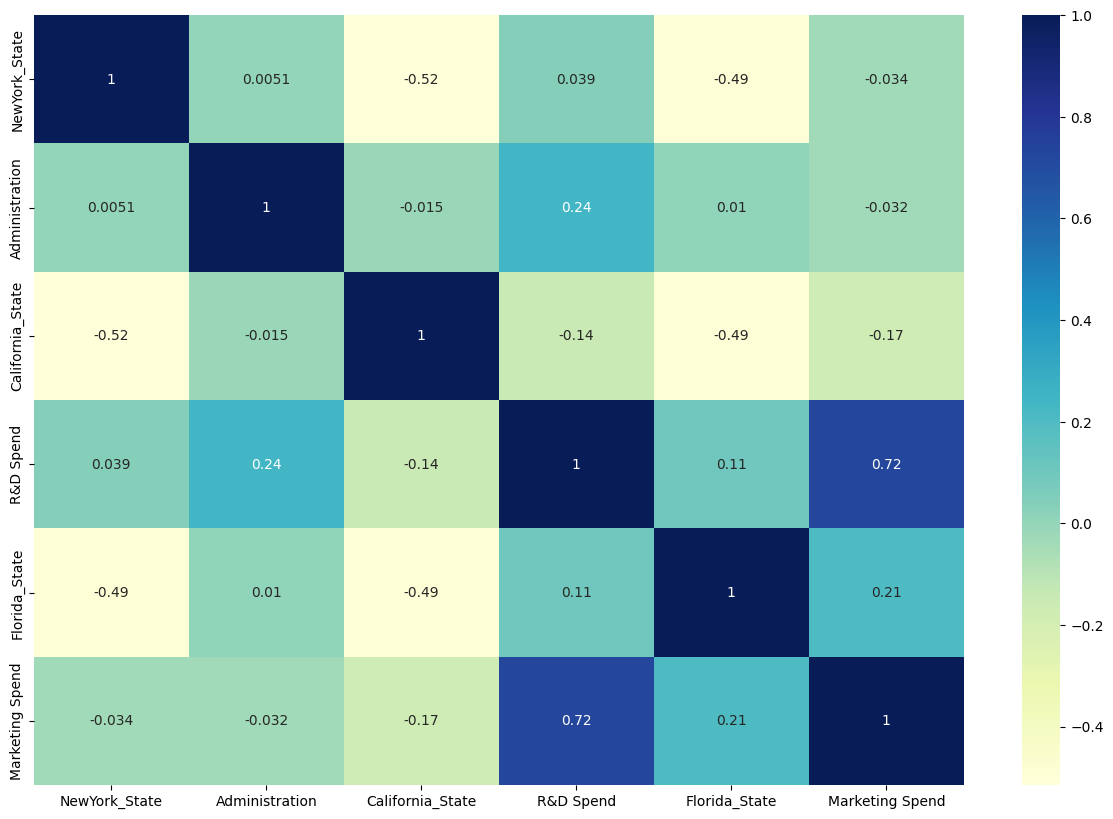

In [30]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset[independent_variables].corr(),  annot=True, cmap="YlGnBu")

i. Correlation between marketing spend and R&D spend is very high, hence it needs attention

ii. Ignoring the correlations between binary variables (state dummy variables) as of now

# Evaluation Metrics

In [31]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))


In [32]:
# Training dataset metrics
print_metrics(y_train, y_train_pred)

MSE is 81571001.80077367
RMSE is 9031.666612578969
RMSE is 0.9501847627493607
MAE is 6341.53575808185
MAPE is 11.643543574245028


In [33]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 83502864.0325773
RMSE is 9137.99015279494
RMSE is 0.9347068473282425
MAE is 7514.293659640598
MAPE is 6.44975408535549


Training set errors and test set errors are almost same, so no underfitting or overfitting detected.

In [34]:
# Adjusted R2

def adjusted_r2(n, k, actual, predicted):
  return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))

In [35]:
adjusted_r2(len(y_train),len(independent_variables), y_train, y_train_pred)

0.9411274468856081